In [130]:
import numpy as np
from last_week import same
from numpy import ndarray
from numpy.typing import ArrayLike

In [6]:
Kmat = np.load("Chladni-Kmat.npy")

Implement centers,radii = gershgorin(A)

In [104]:
def gershgorin(A : ArrayLike) -> (ndarray, ndarray):
    centers = np.diag(A)

    radii = np.zeros(A.shape[0])
    for i in range(A.shape[0]):
        radii[i] = np.sum(np.abs(A[i,:])) - np.abs(A[i,i])
        
    return centers, radii

Localize the eigenvalues of K, and report the disk centers and radii

In [53]:
gershgorin(Kmat)

(array([1.29292219e+05, 1.03041439e+05, 6.49675787e+04, 4.36124119e+04,
        3.62737515e+04, 3.79900994e+04, 2.41669711e+04, 1.16511587e+04,
        1.38650805e+04, 5.60054767e+03, 1.17303879e+03, 1.76077135e+03,
        2.88423061e+02, 8.68968906e+01, 1.38933458e+01]),
 array([4.22316467e+04, 5.69275189e+04, 3.11606709e+04, 1.85323487e+04,
        7.87051614e+03, 1.78547026e+04, 1.54147167e+04, 2.51204139e+03,
        5.50296953e+03, 1.19528329e+03, 3.41990248e+02, 4.01214726e+02,
        7.14173194e+01, 2.54029437e+00, 2.59094641e-01]))

Implement a function lambda = rayleigh_qt(A,x),

In [125]:
def rayleigh_qt(A : ArrayLike,x : ArrayLike) -> float:
    _lambda = x.T @ A @ x/(x.T @ x)
    return _lambda

Implement a function x, k = power iterate(A,x0) for power iteration. Don’t forget to choose and implement a suitable convergence criterion

In [151]:
def power_iterate(A : ArrayLike, x0 : ArrayLike) -> (ndarray, int):
    x0 = x0.copy()
    for k in range(10000):
        ls = x0.copy()
        x0 = A @ x0

        # normalize?
        x0 = x0/np.linalg.norm(x0)

        if (np.linalg.norm(x0 - ls) < 1e-8):
            break

    return x0, k

Test it by finding the largest eigenvalue of the example matrices. Report the eigenvalue found, the Rayleigh residual (the residual of the Raleigh quotient as a least-squares system), and the number k of iterations used. 

In [152]:
from Project2_examplematrices import *

examples = [A1, A2, A3, A4, A5, A6]
example_answers = [eigvals1, eigvals2, eigvals3, eigvals4, eigvals5, eigvals6]

for A, ans in zip(examples, example_answers):
    centers, radii = gershgorin(A)

    x, k = power_iterate(A, centers)
    lambd = rayleigh_qt(A, x)
    print(same(lambd, ans[0]))
    

# TODO: print the right stuff


True
True
True
True
True
True


What is the largest eigenvalue of K? Visualize your eigenfunction using show waves(x,basis set) to see the wave, and show nodes(x,basis set) to see where the sand will gather. The eigenfunction for the largest eigenvalue should have nodes along an 8 x 8 grid. 

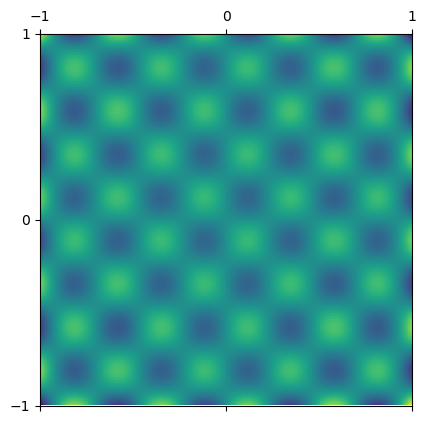

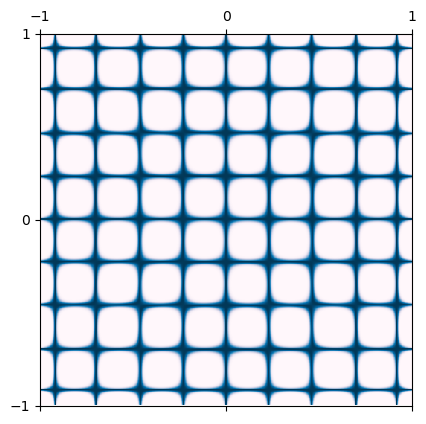

In [153]:
from chladni_show import show_waves, show_nodes
A = Kmat

centers, radii = gershgorin(A)

x, k = power_iterate(A, centers)

lambd = rayleigh_qt(A, x)
show_waves(x)
show_nodes(x)


Write a Rayleigh quotient iteration function x, k = rayleigh iterate(A,x0, shift0), which takes a matrix A, an initial vector x0, and an approximate eigenvalue shift0 as arguments and returns an eigenvector x together with the number k of iterations used. The multiplication by the inverse matrix should be implemented using either your own LUfactorization from as x = lu solve(A,y) or QR-factorization from as x = qr solve(A,y). NB: If you did not get either to work in previous weeks, you can use an in-built linear solver and make a small note that you do this.

Test it with the example matrices, and report the eigenvalues found, Rayleigh residual, and the number k of iterations used. 

In [154]:
from last_week import solve as lu_solve

def rayleigh_iterate(A : ArrayLike, x0 : ArrayLike, shift_0 : float) -> (ndarray, int):
    x = x0.copy()
    sigma_k = shift_0
    for k in range(A.shape[0]):
        sigma_k = rayleigh_qt(A,x)
        x = lu_solve((A-sigma_k*np.eye(A.shape[0])) , x)
        x = x/np.linalg.norm(x)

    return x, k


In [155]:
# # import prettyprint
# from prettyprint import pp

examples[1]

array([[3, 1],
       [1, 3]])

In [156]:
i = 0
for example in examples:
    print(i)
    i += 1
    centers, radii = gershgorin(example)

    x, k = rayleigh_iterate(example, centers, centers[0])



0


c:\Users\jakob\Documents\MscPhysics\Scientific Computing\Project2\last_week.py:75: RuntimeWarning: divide by zero encountered in scalar divide
  x[k] = (y[k] - np.dot(U[k, (k+1):N], x[(k+1):N])) / U[k,k]


OverflowError: cannot convert float infinity to integer

An important feature of inverse iteration and Rayleigh-iteration is the ability to calculate any eigenvalue and its eigenvectors: given an approximate starting point, we obtain an eigenvector to the nearest eigenvalue. 

Why can you not get all the eigenvalues and -vectors with pure poweriteration? (2) Use your Rayleigh quotient iteration function together with the Gershgorin centers to calculate as many eigenvectors and eigenvalues of K as you can. Are you able to get all of them? Why? If not, find the remaining one(s) by any means necessary. Check using show nodes(x,basis set) that the eigenfunction with lowest eigenvalue looks like a cross: 

(3) Construct the transformation matrix T whose columns are the eigenvectors in order of ascending eigenvalues, and check that $K = T\Lambda T^{-1}$ with diagonal $\Lambda$ (4) Visualize your solution using the provided function show all wavefunction nodes(T,lambdas,basis set).